In [1]:
import numpy as np
import pandas as pd
import math
import itertools
import scipy.stats.stats 

In [2]:
from sklearn.model_selection import TimeSeriesSplit

In [3]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [4]:
from scipy.stats import norm

In [5]:
import matplotlib.pyplot as plt

In [6]:
from datetime import datetime

In [7]:
#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

In [8]:
#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

In [9]:
import math

In [10]:
import matplotlib.dates as mdates
import seaborn as sns

In [11]:
def seq_split(X_train, splits):
    #print(X_train.shape)
    list_of_tuple = range(0,X_train.shape[0],(math.ceil(X_train.shape[0]/splits)))
    for i in range(0, math.floor(len(list_of_tuple)/2), 2):
        print((list(list_of_tuple))[:i])

In [12]:
def get_param_grid(param_grid):
    keys, values = zip(*param_grid.items())
    experiments = [dict(zip(keys, v)) for v in itertools.product(*values)]
    #print("Number of combinations from the grid:", len(experiments))
    return experiments


In [13]:
clf1 = LogisticRegression(solver = 'liblinear', random_state = 42)
clf2 = GaussianNB()
clf3 = RandomForestClassifier(n_estimators=100, random_state = 42)
clf4 = Perceptron(random_state = 42)
clf5 = LinearSVC(random_state = 42)
clf6 = KNeighborsClassifier()
clf7 = DecisionTreeClassifier(random_state = 42)

In [14]:
path = "C://Users//James//Documents//Econometrics Recession Code//"
rawdata = pd.read_csv(path + "macrodata_transform_corrected.csv", index_col="Unnamed: 0")
rawdata = rawdata.reset_index().drop('index', axis = 1)

In [15]:
rawdata2 = pd.read_csv(path + "More Macro Data.csv")

In [16]:
rawdata2 = rawdata2.drop(0)
rawdata2 = rawdata2.drop('sasdate',axis = 1)

In [17]:
X = rawdata2.copy()

In [18]:
dates = rawdata['sasdate']

In [19]:
rawdata = rawdata.drop('sasdate', axis = 1)

In [20]:
dates = dates.str.replace('/', '-', regex=True)

In [21]:
dates = dates.values

In [22]:
dates = pd.to_datetime(dates)

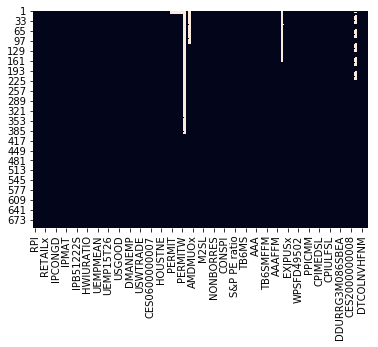

In [23]:
sns.heatmap(X.isnull(), cbar=False)

In [24]:
X = X.drop((X.columns[(X.isna().any())]), axis = 1)

In [25]:
y = rawdata['rec_dates']

Text(0,0.5,'Recession')

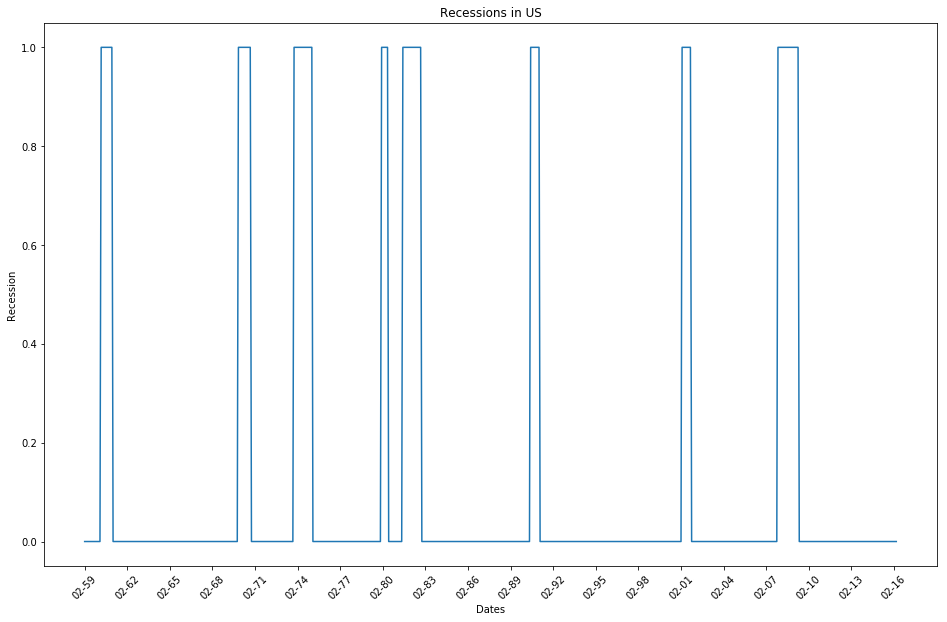

In [26]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)
ax.plot(dates, y)
ax.xaxis.set_ticks(dates[range(0,dates.shape[0],36)])
ax.xaxis.set_tick_params(rotation = 45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
ax.set_title('Recessions in US')
ax.set_xlabel("Dates")
ax.set_ylabel("Recession")

In [27]:
#X all values not transformed
#y all values not transformed

In [28]:
lags = range(1,11) 
cols = X.columns
for i in lags:
    #print(i)
    for j in cols:
        #print(j)
        #print(X_train[j].shift(i))
        X[j + " lag "  + str(i)] = X[j].shift(i)

In [29]:
horizon = -3
y = y.shift(horizon)

In [30]:
X = X.dropna()
not_dropped = X.index
y = y[not_dropped]
y = y.dropna()
not_dropped_y = y.index
X = X.loc[not_dropped_y]


C:\Users\James\Anaconda3\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [31]:
dates = dates[X.reset_index()['index'].values]

In [32]:
y = y.reset_index().drop('index',axis = 1)
X = X.reset_index().drop('index',axis = 1)

In [33]:
dates[:227]

DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01',
               ...
               '1978-02-01', '1978-03-01', '1978-04-01', '1978-05-01',
               '1978-06-01', '1978-07-01', '1978-08-01', '1978-09-01',
               '1978-10-01', '1978-11-01'],
              dtype='datetime64[ns]', length=227, freq=None)

In [34]:
y_train = y.iloc[:227+ 1,-1]

In [35]:
X_train = X.iloc[:227+ 1,:-1]

In [36]:
y_test = y.iloc[227+1:, -1]

In [37]:
test = rawdata.iloc[240:240 + 18]

In [38]:
list_of_corr = []
for i in range(X_train.shape[1]):
    #print(i)
    list_of_corr.append(scipy.stats.stats.pearsonr((X_train.iloc[:,i]), y_train)[0])

In [39]:
list_of_corr = np.array(list_of_corr)
list_of_corr = np.absolute(list_of_corr)

In [40]:
MI = mutual_info_classif(X_train, y_train , random_state=42)

In [41]:
feature_score = pd.DataFrame(data = [list_of_corr, MI] ).T

In [42]:
feature_score.columns = ['Correlation', 'MI']

In [43]:
feature_score[['Corr_Rank', 'MI_Rank']] = feature_score.rank(ascending=False)

In [44]:
X_train.columns

Index(['RPI', 'W875RX1', 'DPCERA3M086SBEA', 'CMRMTSPLx', 'RETAILx', 'INDPRO',
       'IPFPNSS', 'IPFINAL', 'IPCONGD', 'IPDCONGD',
       ...
       'PCEPI lag 10', 'DDURRG3M086SBEA lag 10', 'DNDGRG3M086SBEA lag 10',
       'DSERRG3M086SBEA lag 10', 'CES0600000008 lag 10',
       'CES2000000008 lag 10', 'CES3000000008 lag 10', 'MZMSL lag 10',
       'DTCOLNVHFNM lag 10', 'DTCTHFNM lag 10'],
      dtype='object', length=1297)

In [45]:
feature_score.columns

Index(['Correlation', 'MI', 'Corr_Rank', 'MI_Rank'], dtype='object')

In [46]:
corr_ranking = feature_score.sort_values(by = 'Corr_Rank').index
MI_ranking = feature_score.sort_values(by = 'MI_Rank').index

In [47]:
X_train.columns[corr_ranking]

Index(['AAAFFM lag 2', 'T10YFFM lag 2', 'TB3SMFFM', 'T10YFFM lag 1',
       'TB6SMFFM', 'AAAFFM lag 3', 'AAAFFM lag 1', 'TB3SMFFM lag 1',
       'T5YFFM lag 2', 'TB6SMFFM lag 1',
       ...
       'AMDMNOx lag 1', 'HOUSTW lag 5', 'DPCERA3M086SBEA lag 1',
       'EXSZUSx lag 4', 'EXSZUSx lag 5', 'CES1021000001', 'M1SL lag 2',
       'CLF16OV lag 4', 'PPICMM lag 5', 'CPIAPPSL lag 4'],
      dtype='object', length=1297)

In [48]:
X_train.columns[MI_ranking]

Index(['CES0600000008 lag 1', 'CES3000000008 lag 1', 'CLF16OV lag 6',
       'CPIULFSL lag 3', 'BUSINVx lag 10', 'CPIAPPSL lag 3',
       'CUSR0000SA0L2 lag 10', 'CPIULFSL lag 10', 'CES3000000008 lag 10',
       'DSERRG3M086SBEA lag 3',
       ...
       'HOUST lag 2', 'HOUSTS lag 5', 'HOUSTMW lag 5', 'HOUST lag 5', 'HOUSTS',
       'HOUSTNE lag 8', 'HOUSTS lag 6', 'HOUSTS lag 8', 'HOUSTMW lag 4',
       'HOUSTS lag 2'],
      dtype='object', length=1297)

In [49]:
feature_score['Corr_Rank + MI_Rank'] = (feature_score['Corr_Rank'] + feature_score['MI_Rank']/2)
combined_feats_imp = X_train.columns[feature_score.sort_values(by = "Corr_Rank + MI_Rank").index]

In [50]:
clf1.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)>

In [51]:
parameters = {'C':[0.001, 0.004, 0.007, 0.01, 0.04, 0.07, 0.1, 0.4, 0.7, 1.0] }

In [52]:
from sklearn.metrics import f1_score

In [53]:
list_of_acc = []

In [54]:
from multiprocessing import Pool
from functools import partial


In [ ]:
p.map(grid_s, iterab)
p.close()
p.join()

In [62]:
def grid_search(param_grid, X_train, y_train, clf, splits, scoring,n_jobs):
    p = Pool(n_jobs)
    print(X_train.shape)
    time_split = TimeSeriesSplit(n_splits = splits)
    #Get parameters and output optimal based on kfold
    grid = get_param_grid(param_grid)
    score_list = []
    up_to = math.floor(X_train.shape[0]/splits)
    for i in grid:
        #print(i)
        clf.set_params(**i)
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        result = []
        for train_index, test_index in time_split.split(X_train):
            X_split_train, X_split_test = X_train[train_index], X_train[test_index]
            y_split_train, y_split_test = y_train[train_index], y_train[test_index]
            clf.fit(X_split_train, y_split_train)
            y_pred = clf.predict(X_split_test)
            result.extend(y_pred)
        score = scoring(y_train[up_to:], result)
        score_list.append((score,i,X_train.shape[1]))    
    return ((score_list)[0])

In [ ]:
for i in range(len(combined_feats_imp)):
    if i % 100 == 0:
        print(i)
    list_of_acc.append((i, grid_search(parameters, X_train[combined_feats_imp[:i+1]], y_train, clf1, 18, f1_score)))
    print(list_of_acc)

In [70]:
list_of_acc[0]

0       0.727273
1    {'C': 0.04}
Name: 4, dtype: object

In [233]:
acc = pd.DataFrame(list_of_acc)

In [235]:
acc.shape

(1479, 2)

In [236]:
acc['index'] = range(1,1480)

In [239]:
acc.sort_values(by = 0,ascending = False)

,0,1,index
2,0.785714,{'C': 0.1},53
2,0.785714,{'C': 0.1},52
2,0.785714,{'C': 0.1},235
2,0.785714,{'C': 0.1},234
5,0.764706,{'C': 100},240
4,0.764706,{'C': 10},239
4,0.764706,{'C': 10},57
5,0.764706,{'C': 100},58
0,0.760563,{'C': 0.001},186
0,0.760563,{'C': 0.001},135


In [243]:
def window(X, y, window, start_num, clf):
    y_predicted = []
    for i in range(math.ceil((len(y) - start_num)/window)):
        clf.fit(X.iloc[:start_num,:], y.iloc[:start_num])
        #print(start_num)
        #print(window)
        y_pred = clf.predict(X.iloc[start_num : start_num + window,:])
        y_predicted.extend(y_pred)
        #print(start_num)
        start_num = start_num + window
    return y_predicted

In [245]:
clf1.set_params(**{'C': 0.1})

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [255]:
y_pred = window(X[combined_feats_imp[:53]],y, 18, 227 + 1, clf1)

C:\Users\James\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\James\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\James\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\James\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [256]:
len(y_train)

228

In [257]:
len(y_pred)

445

In [258]:
len(y_test)

445

In [261]:
from sklearn.metrics import confusion_matrix

In [262]:
confusion_matrix(y_pred=y_pred, y_true = y_test)

array([[381,   8],
       [ 40,  16]], dtype=int64)